# Sex Attitudes among women
### In particular, we will investigate the number of heterosexual sexual partners reported by men and women aged 35-44.

* We will look at a series of basic charts with the [seaborn](https://seaborn.pydata.org/) library using data from the NATSAL ([National Survey of Sexual Attitudes and Lifestyles](http://www.natsal .ac.uk)) held in the United Kingdom.

* Data is from the [site](https://github.com/dspiegel29/ArtofStatistics/) ,which accompanies David Spiegelhalter's excellent book *The Art of Statistics*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
natsal = pd.read_csv('natsal_het_sex_partners.csv')
natsal

,NumPartners,Sex
0,1,F
1,10,F
2,4,F
3,20,M
4,8,M
...,...,...
1984,2,M
1985,6,M
1986,8,F
1987,12,M


* Let's get an overall picture of the number of partners, by gender.

In [3]:
natsal.groupby('Sex').describe()

NumPartners                                                  
          count       mean        std  min  25%  50%   75%    max
Sex                                                              
F        1193.0   8.230511  17.955052  0.0  2.0  5.0  10.0  550.0
M         796.0  16.978643  37.807367  0.0  4.0  8.0  20.0  501.0

* In addition to the impressive performance we observe, what is the typical number of companions?

In [4]:
natsal.groupby('Sex').agg(lambda x: x.value_counts().index[0])

,NumPartners
Sex,
F,1
M,1


* The first step in looking at the distribution of the number of partners is to construct a histogram.

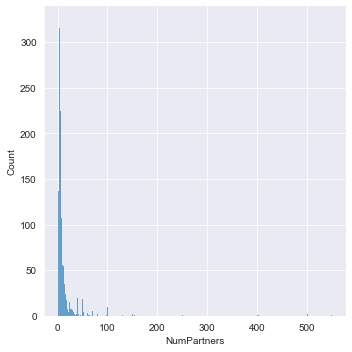

In [5]:
sns.set_style('darkgrid')
sns.displot(natsal, x="NumPartners")

* To avoid compressing the histogram on the left due to champions in relationships, let's limit our interest to cases reporting up to 50 partners.

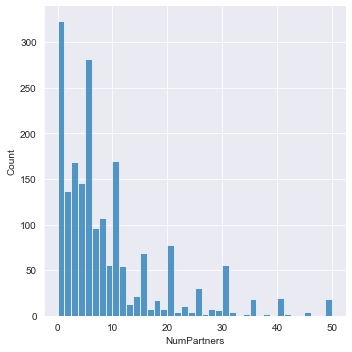

In [6]:
natsal_50 = natsal[natsal['NumPartners'] <= 50]
sns.displot(natsal_50, x="NumPartners")

* It's a bit better now, but it would be even better if we made the chart and font a little bigger.

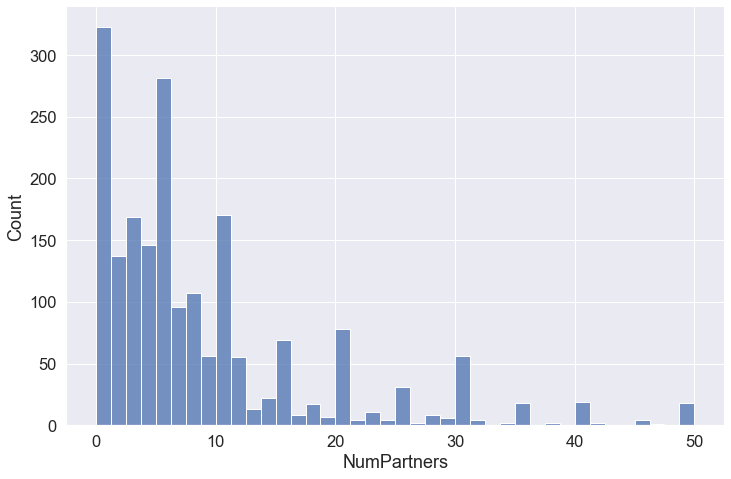

In [7]:
sns.set_theme(font_scale=1.5)
_ = sns.displot(natsal_50, x="NumPartners",
                height=7, aspect=1.5)

* We saw the big picture.

* How do men and women compare?

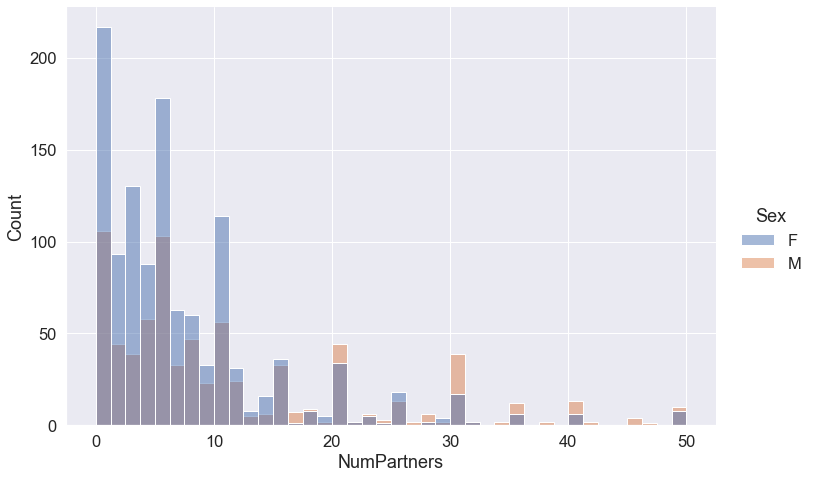

In [8]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                height=7, aspect=1.5)

* Let's use the traditional male-female colors.

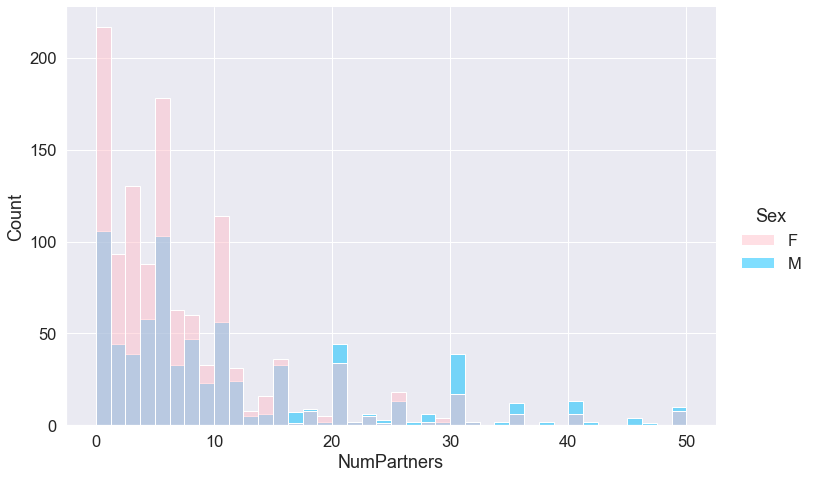

In [9]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                palette={'M': 'deepskyblue', 'F': 'pink'},
                height=7, aspect=1.5)

* The bad thing is that the two sexes fall on each other.

* Let's move them to be side by side.

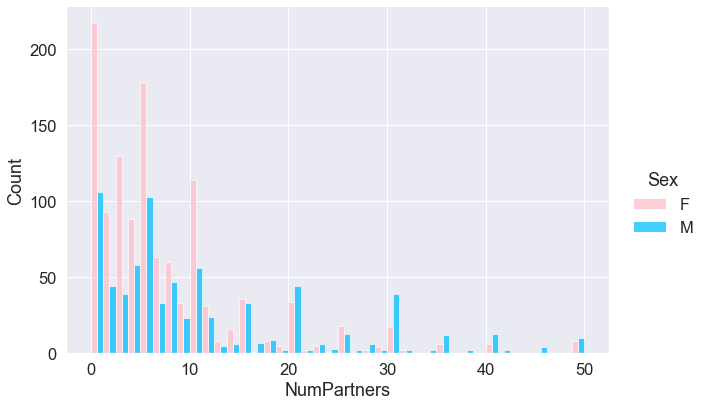

In [10]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                palette={'M': 'deepskyblue', 'F': 'pink'},
                multiple="dodge",
                height=6, aspect=1.5)

* The white frame around each bar can be confused with the white lines of the canvas.

* We can make the frame black.

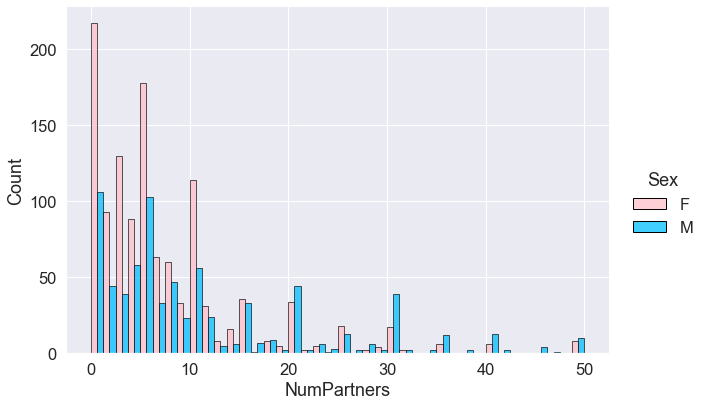

In [11]:
_ = sns.displot(natsal_50, x="NumPartners",
                hue="Sex",
                edgecolor='black', palette={'M': 'deepskyblue', 'F': 'pink'}, 
                multiple="dodge",
                height=6, aspect=1.5)

* The difference in the distribution of the number of partners between men and women can be seen clearly with boxplots.

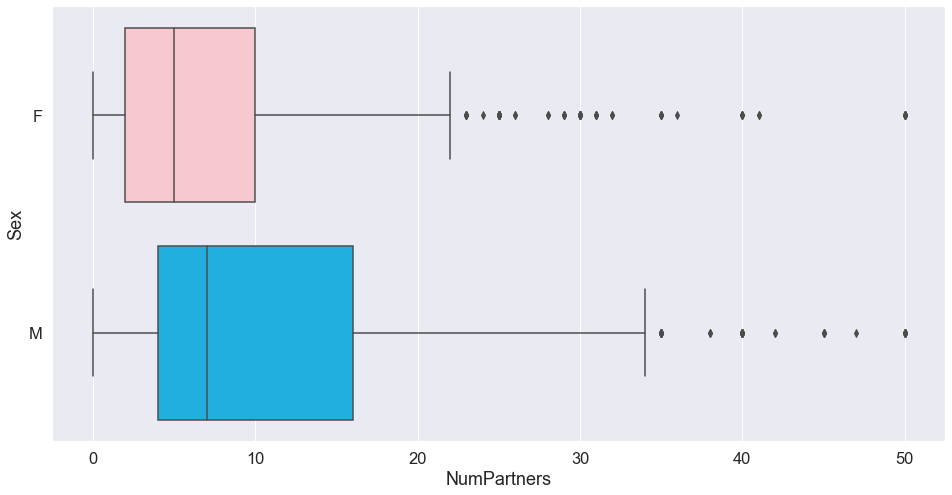

In [12]:
plt.figure(figsize=(16, 8))
_ = sns.boxplot(x=natsal_50['NumPartners'],
                y=natsal_50['Sex'],
                palette={'M': 'deepskyblue', 'F': 'pink'})

* Another type of diagram, which can give us a good overview of our data, is the *stripplot*.

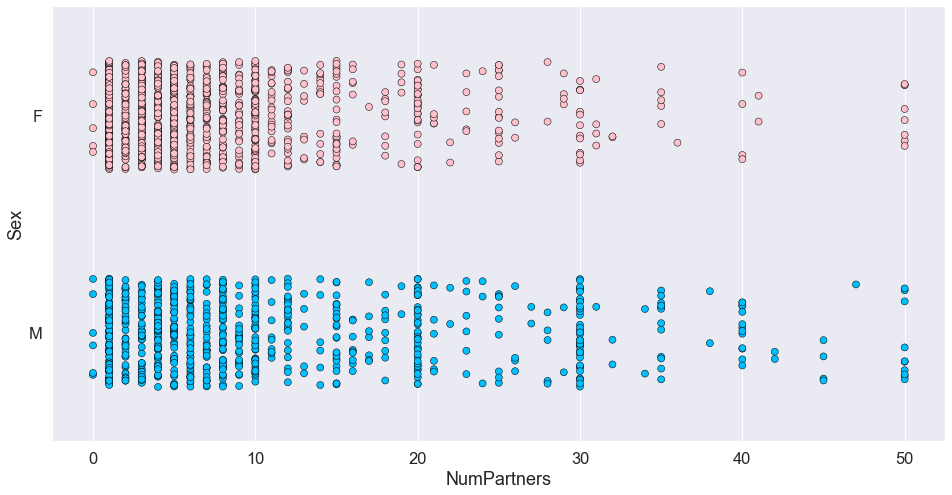

In [13]:
plt.figure(figsize=(16, 8))
_ = sns.stripplot(x=natsal_50['NumPartners'],
                  y=natsal_50['Sex'],
                  linewidth=0.5, # mark line
                  size=7, # mark size
                  jitter=.25, # spread around the middle
                  edgecolor='black', palette={'M': 'deepskyblue', 'F': 'pink'})

* And another, perhaps more exotic type of diagram, is the *violin plot*.

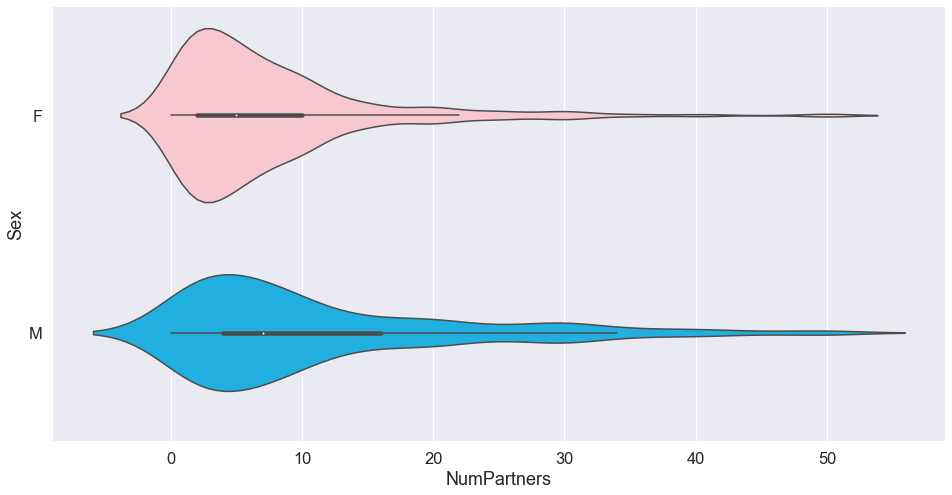

In [14]:
plt.figure(figsize=(16, 8))
_ = sns.violinplot(x=natsal_50['NumPartners'],
                   y=natsal_50['Sex'],
                   edgecolor='black',
                   palette={'M': 'deepskyblue', 'F': 'pink'})

* All charts show clear differences between numbers of partners: men consistently report more partners than women.

* But if we consider that we are talking about a closed population, this is simply mathematically impossible!

* So either men are lying by reporting more partners, or women are lying by reporting fewer partners, or both.

In [15]:
natsal.groupby('Sex').describe()

NumPartners                                                  
          count       mean        std  min  25%  50%   75%    max
Sex                                                              
F        1193.0   8.230511  17.955052  0.0  2.0  5.0  10.0  550.0
M         796.0  16.978643  37.807367  0.0  4.0  8.0  20.0  501.0